In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [5]:
type(df.area)

pandas.core.series.Series

In [6]:
type(df[['area']])

pandas.core.frame.DataFrame

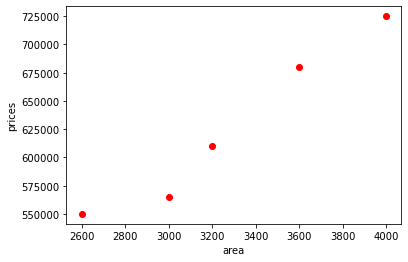

In [7]:
plt.xlabel('area')
plt.ylabel('prices')
plt.scatter(df.area, df.price, color='r')

In [8]:
reg = linear_model.LinearRegression()

In [13]:
# takes first argument as 2d array
reg.fit(df[['area']], df.price)

LinearRegression()

In [14]:
reg.predict([[3300]])

array([628715.75342466])

## Linear Regression uses:
### y = mx + c

In [16]:
reg.coef_

array([135.78767123])

In [17]:
reg.intercept_

180616.43835616432

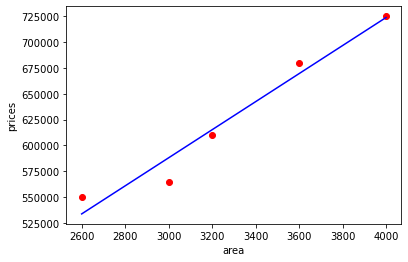

In [18]:
plt.xlabel('area')
plt.ylabel('prices')
plt.scatter(df.area, df.price, color='r')
plt.plot(df.area, reg.predict(df[['area']]), color='b')

### Exercise to Predict canada's per capita income in year 2020

In [19]:
df = pd.read_csv('canada_per_capita_income.csv')

In [20]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [25]:
df.columns.values

array(['year', 'per capita income (US$)'], dtype=object)

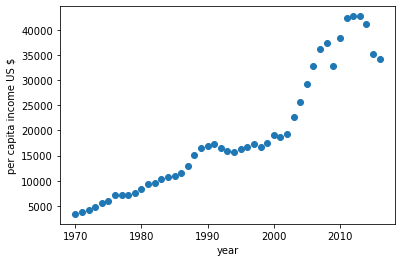

In [28]:
plt.xlabel("year")
plt.ylabel("per capita income US $")
plt.scatter(df.year, df['per capita income (US$)'])

In [29]:
reg = linear_model.LinearRegression()

In [30]:
reg.fit(df[['year']], df['per capita income (US$)'])

LinearRegression()

In [31]:
reg.predict([[2020]])

array([41288.69409442])

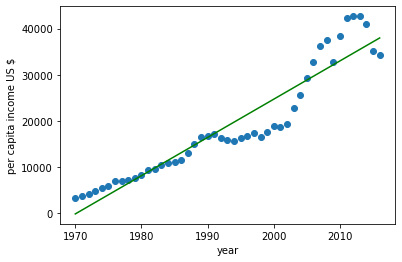

In [40]:
plt.xlabel("year")
plt.ylabel("per capita income US $")
plt.scatter(df.year, df['per capita income (US$)'])

plt.plot(df.year, reg.predict(df[['year']]), color='g')

## Multi variable Linear Regression

### The equation used is
### y = m1x1 + m2x2 + ... + mn xn + b
#### where b is the intercept and m1, m2, ... are the slopes

In [43]:
df = pd.read_csv('homeprices2.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### The data has a NaN value that should be replaed with median

In [44]:
median_bedroom = df.bedrooms.median()
median_bedroom

4.0

In [46]:
df.bedrooms = df.bedrooms.fillna(median_bedroom)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [47]:
reg = linear_model.LinearRegression()

In [48]:
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

Given these home prices find out price of a home that has,

3000 sqr ft area, 3 bedrooms, 40 year old

2500 sqr ft area, 4 bedrooms, 5 year old

In [49]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])

In [50]:
reg.predict([[2500, 4, 5]])

array([578876.03748933])

In [54]:
print(reg.coef_)
print(reg.intercept_)

[  112.06244194 23388.88007794 -3231.71790863]
221323.00186540408


### Exercise
hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [55]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [57]:
import math

median_test = math.floor(df['test_score(out of 10)'].mean())
median_test

7

In [58]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [59]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [63]:
# converting experience to numbers
# install word2number in anaconda promt using 
# conda install -c conda-forge word2number

from word2number import w2n

# df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [64]:
reg = linear_model.LinearRegression()

In [66]:
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [67]:
reg.predict([[2,9,6]])

array([53713.86677124])

In [68]:
reg.predict([[12,10,10]])

array([93747.79628651])

In [69]:
print(reg.coef_)
print(reg.intercept_)

[2922.26901502 2221.30909959 2147.48256637]
14992.65144669314


## Gradient Descent


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [16]:
def gradient_descent(x, y):
    m_cur = b_cur = 0
    # through trials by checking cost on different rates
    rate = 0.01
    n = len(x)
    # also through trials
    iterations = 1000
    
    plt.scatter(x,y,color='red')
    
    for i in range(iterations):
        y_pred = m_cur * x + b_cur
        m_d = -(2/n) * sum(x * (y - y_pred))
        b_d = -(2/n) * sum(y - y_pred)
        cost = 1/n * sum([val**2 for val in (y-y_pred)])
        m_cur = m_cur - rate * m_d
        b_cur = b_cur - rate * b_d
        
        plt.plot(x, y_pred, color='g')
        
        # last iteration
        if(i == 999):
            print("cost: ", cost)
            print("y:", y)
            print('y_pred:', y_pred)
            plt.plot(x, y_pred, color='b', linewidth='2')

cost:  0.0010817613206833153
y: [ 5  7  9 11 13]
y_pred: [ 4.94426127  6.96561451  8.98696775 11.00832099 13.02967423]


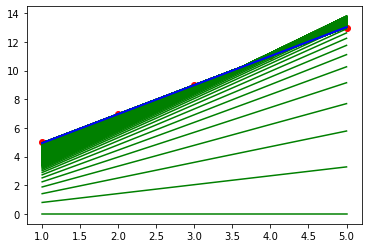

In [17]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x, y)

## Categorical Variables and One Hot Encoding

In [18]:
df = pd.read_csv("homeprices3.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


Dummy variables has to be created to denote to different towns as they are string values. A different column is created for each town and value 1 is assigned to rows which are of that town.

## Using pandas to create dummy variables

In [20]:
dummies = pd.get_dummies(df.town)

merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [22]:
# we can drop town as well as one of the dummy variable
final = merged.drop(['town', 'west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


#### Dummy Variable Trap
When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you

In [23]:
# The x will be all the values except price and the y will be price
X = final.drop('price', axis='columns')
y = final.price

reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression()

In [24]:
reg.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

array([681241.66845839])

In [25]:
reg.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

In [28]:
reg.score(X, y)

0.9573929037221873

## Using sklearn OneHotEncoder

First step is to use label encoder to convert town names into numbers

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [35]:
X = dfle[['town','area']].values
y = dfle.price.values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [36]:
# Now use one hot encoder to create dummy variables for each of the town

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [38]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [39]:
# dropping 0th col
X = X[:, 1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [40]:
reg.fit(X, y)

LinearRegression()

In [42]:
reg.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.6684584])

In [43]:
reg.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

In [44]:
reg.score(X, y)

0.9573929037221874

#### Exercise

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [4]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


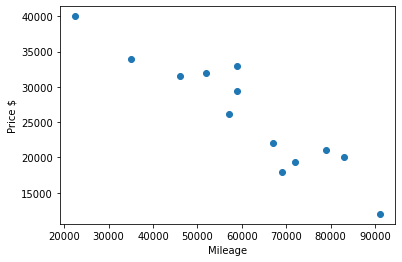

In [17]:
plt.xlabel('Mileage')
plt.ylabel('Price $')
plt.scatter(df.Mileage, df['Sell Price($)'])

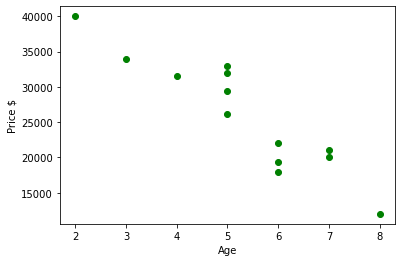

In [18]:
plt.xlabel('Age')
plt.ylabel('Price $')
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], color='g')

### 3d Plot


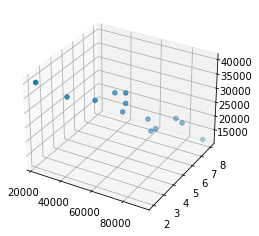

In [20]:
# importing mplot3d from
# mpl_toolkits
from mpl_toolkits import mplot3d
 
# creating an empty canvas
fig = plt.figure()
 
# defining the axes with the projection
# as 3D so as to plot 3D graphs
ax = plt.axes(projection="3d")

ax.scatter3D(df.Mileage,df['Age(yrs)'], df['Sell Price($)'], cmap='cividis')

### One hot encoder using sk learn

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
dfle = df
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


We can see that 1 is denoted to BMW, 0 to Audi and 2 to Mercedez.

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder='passthrough')

In [29]:
y = dfle['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [30]:
X = dfle[['Car Model', 'Mileage', 'Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [31]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [33]:
X = X[:, 1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

1 0 for BMW
0 0 for Audi
0 1 for Mercedez

In [34]:
model = linear_model.LinearRegression()

In [35]:
model.fit(X, y)

LinearRegression()

In [41]:
# 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000
model.predict([[0, 1, 45000, 4]])

array([36991.31721062])

In [43]:
# 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000
model.predict([[1, 0, 86000, 7]])

array([11080.74313219])

In [44]:
# 3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())
model.score(X, y)

0.9417050937281083

In [45]:
model.predict([[0, 1, 59000, 5]])

array([30477.15426157])

## Train, Test data

In [47]:
df = pd.read_csv('BMW_carprices.csv')
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [48]:
X = df[['Mileage', 'Age(yrs)']]
y = df['Sell Price($)']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# 0.2 means 20% data is test
# there is also an attribute random_state=10 which will not change train and test data on refresh

In [59]:
print(len(X), len(X_train), len(X_test))

20 16 4


In [60]:
model = linear_model.LinearRegression()

In [61]:
model.fit(X_train, y_train)

LinearRegression()

In [62]:
model.score(X_test, y_test)

0.9789653418675891

In [63]:
model.predict(X_test)

array([38740.01790965, 15206.78162718, 36852.04616156, 34251.42033815])

In [64]:
y_test

3     40000
18    12800
16    35500
1     34000
Name: Sell Price($), dtype: int64